## Homo

### D=0ug/ml, 8ug/ml

In [7]:
import numpy as np

def plot_spatial_OD_per_time(ax, OD_Ts, L, T_cycle, num_T, Initial="PlateReader", Plot_Legend=False):
    pos_list = [i for i in range(L)]
    t_n = num_T + 1
    
    # the beginning
    if Initial == "PlateReader":
        ax.plot(pos_list, np.mean(np.array(OD_Ts)[0, :])*np.ones(L), '--', color='0.8', label="Before Diffusion")
    else:
        ax.plot(pos_list, Initial*np.ones(L), '--', color='0.8', label="Before Diffusion")
    
    # the rest
    for t in range(1, t_n):
        c = (0, 0, t/t_n, 0.3)  # Color change based on time
        OD_T = np.array(OD_Ts)[t, :]
        if OD_T.ndim == 2:  # with replicates
            OD_i_avg = np.mean(OD_T, axis=0)
            OD_i_std = np.std(OD_T, axis=0)
            
            # plot the error bars
            ax.plot(pos_list, OD_i_avg, label=f"T={t*T_cycle}h", color=c)
            ax.errorbar(pos_list, OD_i_avg, yerr=OD_i_std, fmt='o', color=c, ecolor=c, markeredgecolor=(0,0,0,0.3), capsize=5, label=f"T={t*T_cycle}h")
            
        else:  # without replicates, or after averaging
            OD_i_avg = OD_T
            
            # just plot without error bars
            ax.plot(pos_list, OD_i_avg, label=f"T={t*T_cycle}h", color=c)
            ax.scatter(pos_list, OD_i_avg, color=c, edgecolor=(0,0,0,0.3))  # averaged data

    ax.set_xlabel("position")
    ax.set_ylabel("OD")
    if Plot_Legend:
        ax.legend(loc="upper left")

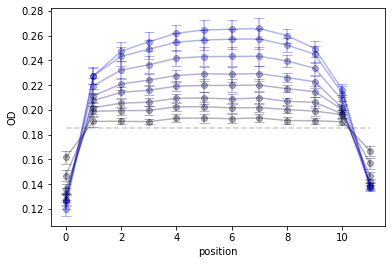

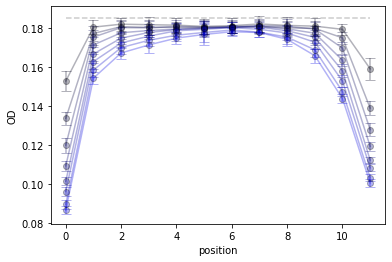

In [8]:
import pickle
import matplotlib.pyplot as plt


# Load processed data
with open("ODs_D0_D8.pkl", "rb") as f:
    data = pickle.load(f)

selected_ODs = data["selected_ODs"]
OD0_Ds = data["OD0_Ds"]
T_cycle = data["T_cycle"]
num_T = data["num_T"]
L = data["L"]

# Generate plots
for OD_Ts in selected_ODs:
    fig, ax = plt.subplots()
    plot_spatial_OD_per_time(ax, OD_Ts, L, T_cycle, num_T, Initial=OD0_Ds, Plot_Legend=False)
    plt.show()
